# **YouTube Trending Videos Analysis:**

In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
Note: you may need to restart the kernel to use updated packages.


**Loading the necessary libraries:**

In [1]:
import pandas as pd #Data loading
import numpy as np
import datetime #Data Modification
import time

import seaborn as sns #Data Visualisation
import matplotlib.pyplot as plt#Data Visualisation
%matplotlib inline
import cv2
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import wordcloud
import json

## **Dataset Loading:**

In [2]:
df1=pd.read_csv("INvideos.csv")

In [3]:
df = df1.copy()

In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

In [6]:
df.shape

(37352, 16)

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [8]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## **Data Cleaning and Modification:**

**Converting Data type of series**

In [9]:
str_list=['video_id','title','channel_title','tags','thumbnail_link','description']
df[str_list]=df[str_list].astype('str')

In [10]:
cat_list=['comments_disabled','ratings_disabled','video_error_or_removed']
df[cat_list]=df[cat_list].astype('category')

**Changing trending_date to datetime datatype**

In [11]:
df['trending_date'] = df['trending_date'].astype('str') 
date_pieces = (df['trending_date'].str.split('.'))
df['Year'] = date_pieces.str[0].astype(int)
df['Day'] = date_pieces.str[1].astype(int)
df['Month'] = date_pieces.str[2].astype(int)
updatedyear = []
for i in range(len(df)) : 
    y = df.loc[i, "Year"]
    newy = y+2000
    updatedyear.append(newy)
for i in range(len(df)):
    newy = updatedyear[i]
    tr = df.loc[i, "Year"]
    df['Year'].replace(to_replace = tr, value = newy, inplace=True)
del df['trending_date']
df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format = "%Y-%m-%d")
del df['Year']
del df['Day']
del df['Month']

In [12]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
df.insert(4, 'publish_date', df['publish_time'].dt.date)
df['publish_time'] = df['publish_time'].dt.time
df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")

In [13]:
df.dtypes

video_id                          object
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
trending_date             datetime64[ns]
dtype: object

**Plotting the Null values of our dataset:**

<Figure size 640x480 with 0 Axes>

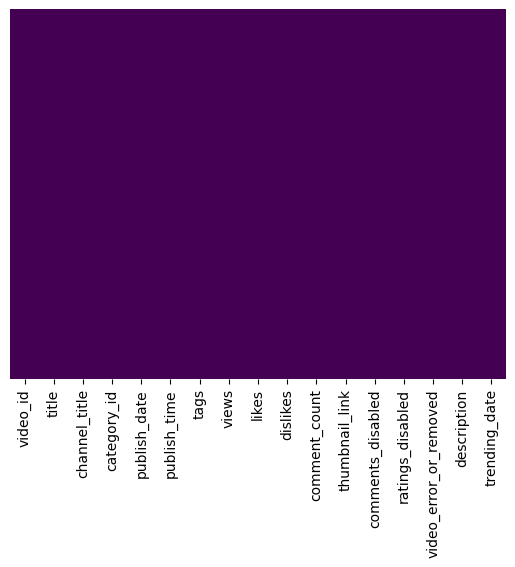

<Figure size 640x480 with 0 Axes>

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.figure()

In [15]:
print('Nan values present in each column')
print()
for i in df:
    print(i,':',df[i].isna().sum())
print()
print('total Nan values present in dataframe are',':',df.isna().sum().sum())

Nan values present in each column

video_id : 0
title : 0
channel_title : 0
category_id : 0
publish_date : 0
publish_time : 0
tags : 0
views : 0
likes : 0
dislikes : 0
comment_count : 0
thumbnail_link : 0
comments_disabled : 0
ratings_disabled : 0
video_error_or_removed : 0
description : 0
trending_date : 0

total Nan values present in dataframe are : 0


We can observe that there are no null values are present in our dataset.

**Dropping few columns** as they aren't necessary for our analysis:

In [16]:
df.drop(['video_id','thumbnail_link','description'], axis=1, inplace=True)

In [17]:
df.shape

(37352, 14)

Since we have trending time and publish time, we can calculate the time difference it takes for a video to trend

In [18]:
df['time_diff'] = df['trending_date'] - df['publish_date']

In [19]:
df['time_diff'].head()

0   2 days
1   1 days
2   2 days
3   2 days
4   1 days
Name: time_diff, dtype: timedelta64[ns]

In [20]:
df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_date,time_diff
0,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,2017-11-14,2 days
1,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,2017-11-14,1 days
2,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,2017-11-14,2 days
3,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,2017-11-14,2 days
4,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,2017-11-14,1 days


In [21]:
df.dtypes

title                              object
channel_title                      object
category_id                         int64
publish_date               datetime64[ns]
publish_time                       object
tags                               object
views                               int64
likes                               int64
dislikes                            int64
comment_count                       int64
comments_disabled                category
ratings_disabled                 category
video_error_or_removed           category
trending_date              datetime64[ns]
time_diff                 timedelta64[ns]
dtype: object

In [22]:
df.shape

(37352, 15)

### Translation:


Now we'll preprocess the text data

In [23]:
df['title'].head()

0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
1    पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...
2    Stylish Star Allu Arjun @ ChaySam Wedding Rece...
3                       Eruma Saani | Tamil vs English
4    why Samantha became EMOTIONAL @ Samantha naga ...
Name: title, dtype: object

As we can see, Some titles are in regional languages so it should be translated into english.

In [24]:
!pip install googletrans==4.0.0rc1

  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
spyder 5.2.2 requires ipython<8.0.0,>=7.6.0, but you have ipython 8.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


we can now use googletrans

In [25]:
import googletrans
from googletrans import Translator

Removing Punctuation

In [26]:
df['title'] = df['title'].str.replace(r'[^\w\s]+', '')
df['title'].head()

0    Sharry Mann Cute Munda  Song Teaser  Parmish V...
1           परयडस क समय पट पर पत करत ऐस दखकर दग रह जयग
2    Stylish Star Allu Arjun  ChaySam Wedding Recep...
3                        Eruma Saani  Tamil vs English
4    why Samantha became EMOTIONAL  Samantha naga c...
Name: title, dtype: object

As we know, our dataset is HUGE-37352 rows. So Translator will give an <br>*ReadTimeout: The read operation timed out* Error.<br>
Hence, we will be splitting our dataset into 14 smaller datasets, run the translator on each dataframe and combine all the translated datasets into one whole and perform our analysis on it.

In [27]:
df["translated"] = df.apply(lambda _: ' ', axis=1)

In [28]:
df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_date,time_diff,translated
0,Sharry Mann Cute Munda Song Teaser Parmish V...,Lokdhun Punjabi,1,2017-11-12,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,2017-11-14,2 days,
1,परयडस क समय पट पर पत करत ऐस दखकर दग रह जयग,HJ NEWS,25,2017-11-13,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,2017-11-14,1 days,
2,Stylish Star Allu Arjun ChaySam Wedding Recep...,TFPC,24,2017-11-12,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,2017-11-14,2 days,
3,Eruma Saani Tamil vs English,Eruma Saani,23,2017-11-12,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,2017-11-14,2 days,
4,why Samantha became EMOTIONAL Samantha naga c...,Filmylooks,24,2017-11-13,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,2017-11-14,1 days,


In [30]:
translator = Translator()
translations = {}
for i in df.index:
    df['translated'][i] = translator.translate(str(df['title'][i])).text
    time.sleep(1)
   
#wo=translator.translate("Der Himmel ist blau und ich mag Bananen")
#print(wo.text)

ReadTimeout: The read operation timed out

In [31]:
df.translated.head()

0    Shari Mann Chuthe Munda Song Teaser Paramish V...
1             Time on the time of Paradus, such a look
2    Stylish Star Allu Arjun Chaisam Wedding Recept...
3                        Eduma Sani Tamil Weis English
4    Y Samantha Bechame Emotional Samantha Naga Cha...
Name: translated, dtype: object

Titles in regional languages have been translated to english for further analysis

Calculating the average days it takes for a video to trend

In [32]:
df.time_diff.mean()

Timedelta('2 days 02:05:56.992932105')

Checking the number of Unique channels whose videos reached the trending page 

In [33]:
print("unique channels : ",df.channel_title.nunique())
print("records available : ",df.shape)

unique channels :  1426
records available :  (37352, 16)


The number of records available is more than the unique channels


Hence it can be concluded that some channels had numerous videos trend

## **EDA - Exploratory Data Analysis:**

In [34]:
# Colors for visualisation:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#db7093", "#003f5c", "#6f00ff", "#a92344", "#ff33ff", "#a8f1c5"]

### **Correlation between dataset variables:**

In [60]:
df.corr()

,category_id,views,likes,dislikes,comment_count,title_length,contains_capitalized
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,-0.208087,0.023658
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.009200,-0.019682
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.126152,-0.008185
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.016777,-0.011752
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.092014,0.007732
title_length,-0.208087,-0.009200,-0.126152,-0.016777,-0.092014,1.000000,0.077125
contains_capitalized,0.023658,-0.019682,-0.008185,-0.011752,0.007732,0.077125,1.000000


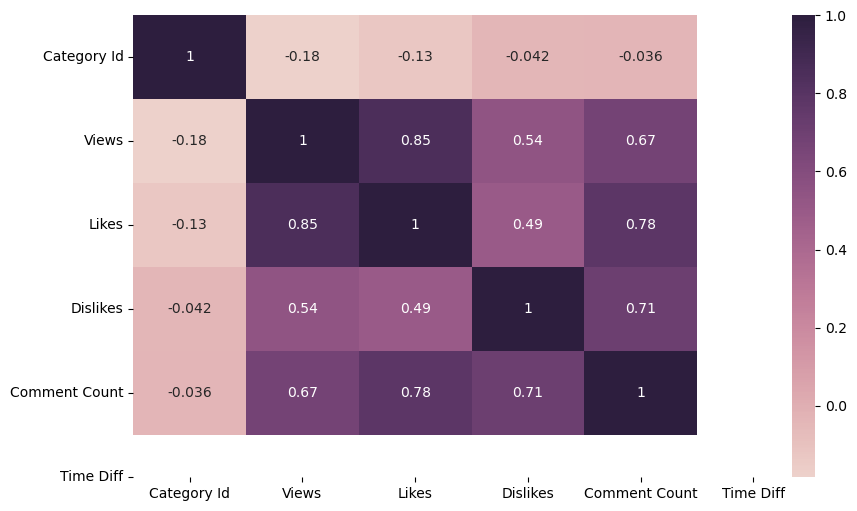

In [35]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

Correlation between Output variable and Input Variables should be strong (>0.85)
There should be no strength between Input Variables, no strong Input-Input Relations.

The correlation map and correlation table above say that views and likes are highly positively correlated(0.85). Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

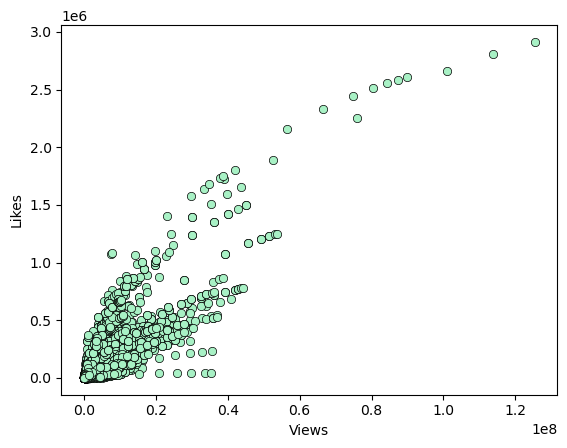

In [36]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[8], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

### **Video Title Lengths:**

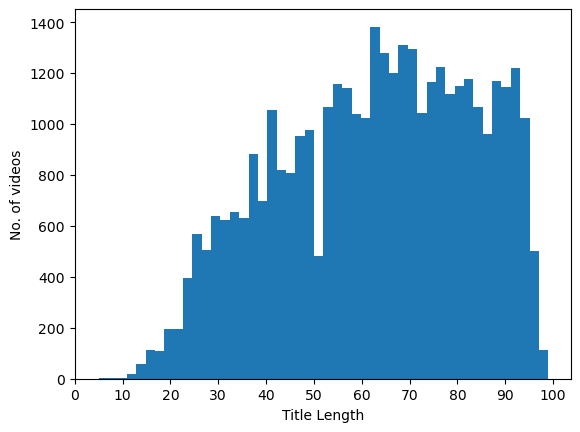

In [37]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

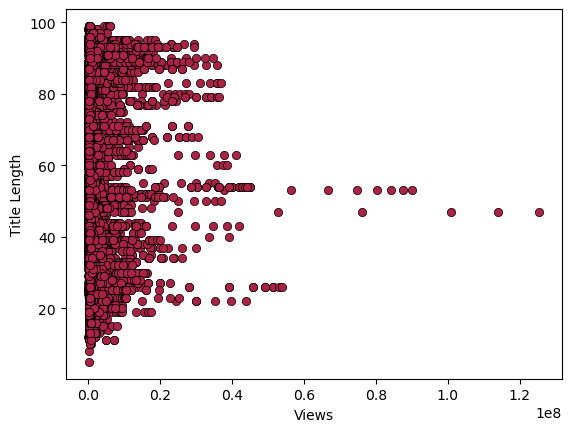

In [38]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[6], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

We can observe that most of the trending videos have their title lengths in between teh range of 60-80 characters.

### **Which channels have the largest trending videos:**

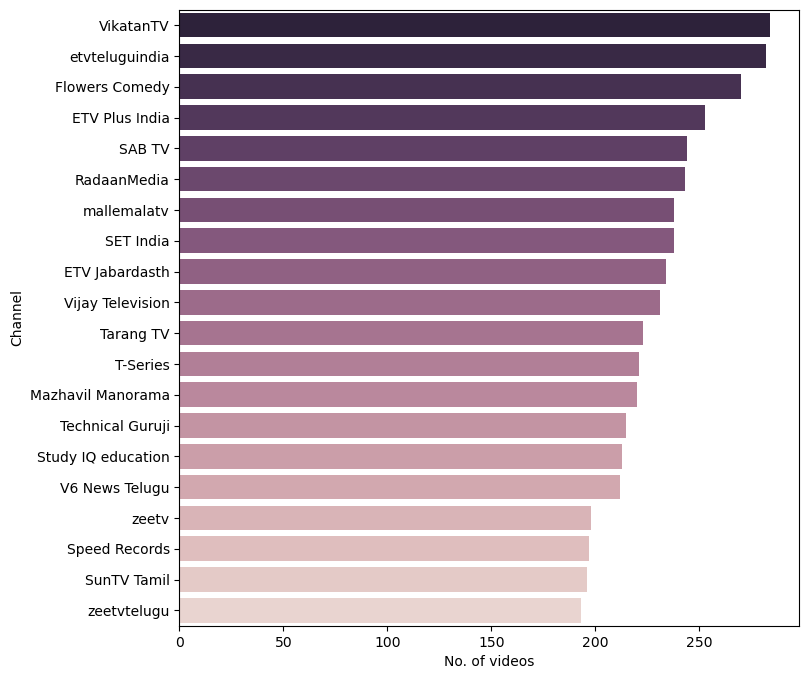

In [39]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

We can conclude that ViratanTV and etvteluguindia are the channels with most of teh trending videos, followed by Flowers Comedy. The channel with least trending videos is zeetvtelugu.

### **Trending videos publishing time:**

In [40]:
df['publishing_day'] = df['publish_date'].dt.day_name()

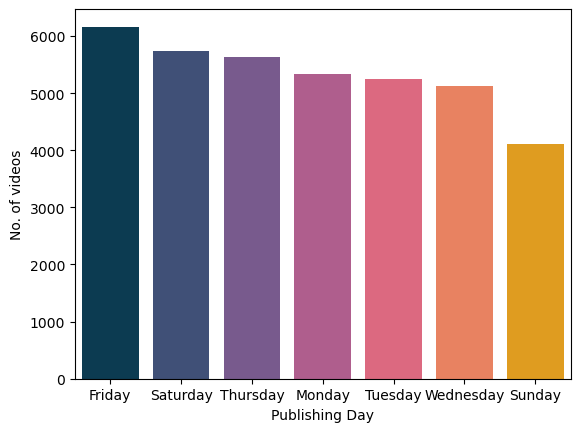

In [45]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday and wednesday are noticeably less than the number of trending videos published on other days of the week.


### **How many trending videos have their comments disabled?**



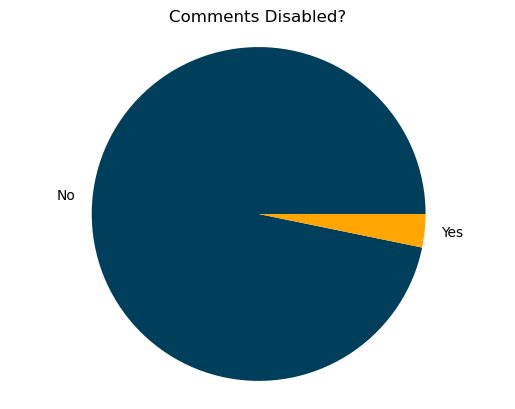

In [49]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

More than 90% people seem to have enabled comments.

### **How many trending videos have their Capital letters in their titles?**

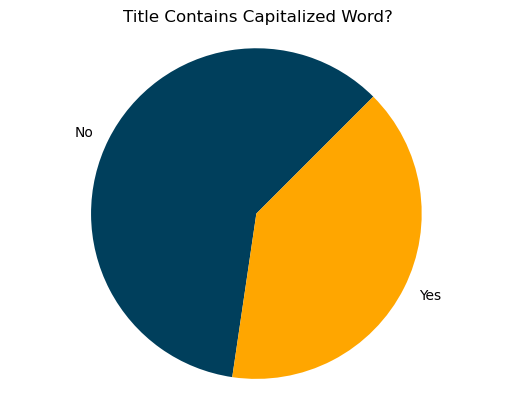

In [50]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [67]:
df["contains_capitalized"].value_counts()

False    22474
True     14878
Name: contains_capitalized, dtype: int64

In [62]:
(value_counts[True]/(value_counts[False]+value_counts[True])) * 100

39.831869779396015

In [63]:
(value_counts[False]/(value_counts[False]+value_counts[True])) * 100

60.168130220603985

We can see that approximately 60% of the video titles do not consist of Capital letters where as around 40% have capital letters in their titles.

### **How many trending videos have an error?**

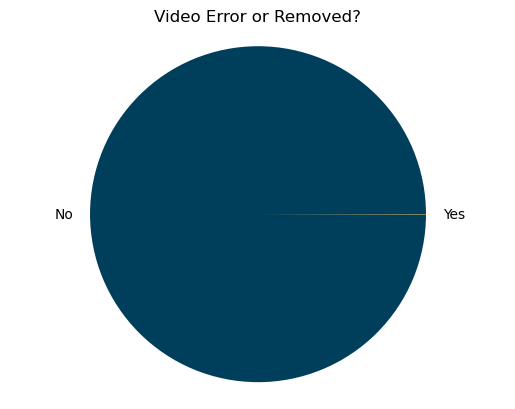

In [64]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [66]:
df["video_error_or_removed"].value_counts()

False    37341
True        11
Name: video_error_or_removed, dtype: int64

In [65]:
(value_counts[True]/(value_counts[False]+value_counts[True])) * 100

0.029449560933818807

We can see that out of videos that appeared on trending list (37,352 videos), there is a tiny portion (11 videos) with errors.

### **Word Cloud for the titles of our trending videos:**

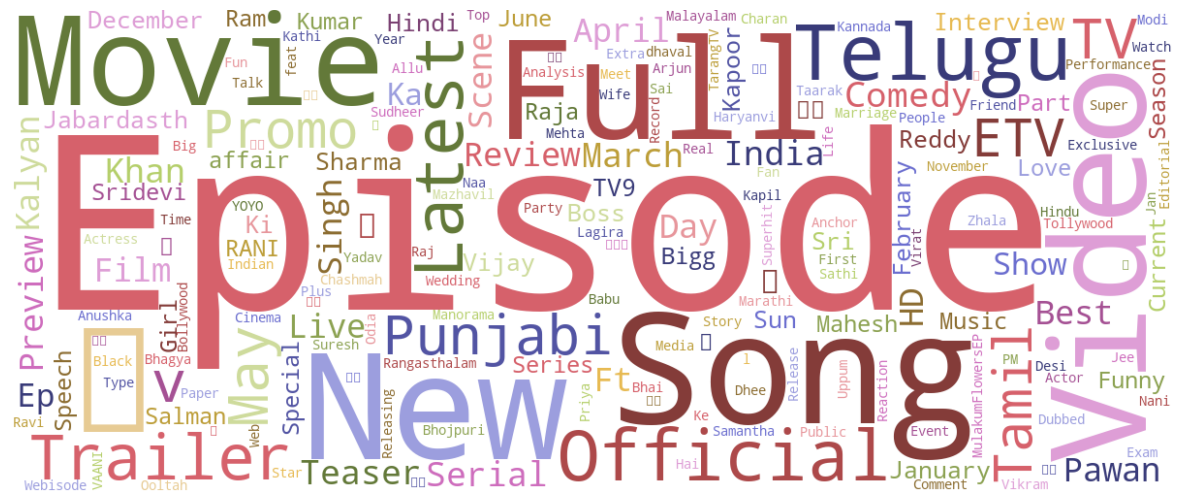

In [52]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

We can see the words 'Episode', 'Song', 'New', 'Full', 'Movie', 'Video', 'Telugu', 'Official', 'Trailer', 'Punjabi' in huge fonts which indicate these words were common also in trending video titles.

### **Likes Histogram:**

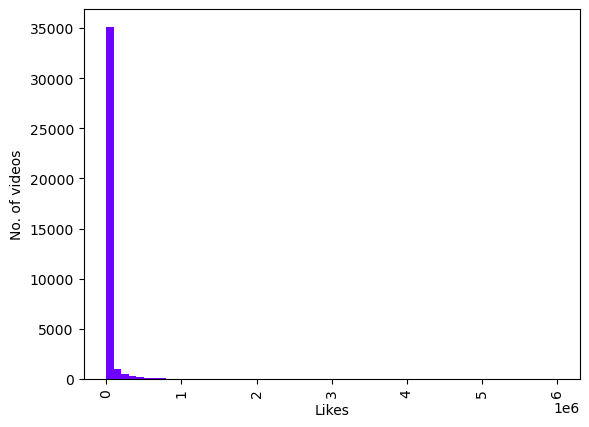

In [53]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[5], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

We can notice that majority of the trending videos have likes between 0 and 50,000. Increasing the margine, let's plot a histogram for the videos with 70,000 likes or less to get a closer look at the distribution of the data.

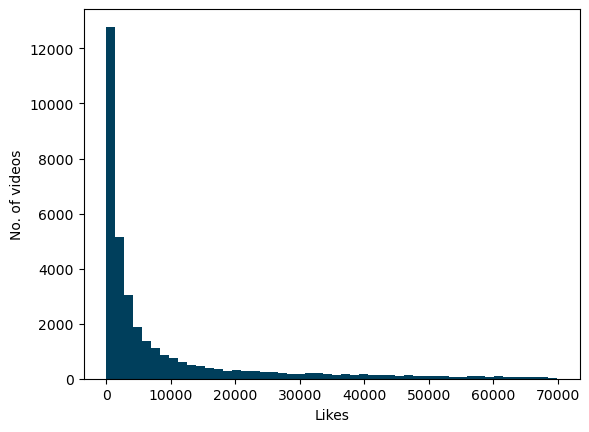

In [54]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 7e4]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have 25000 likes or less with a peak for videos with 5000 likes or less.

Let's see the exact percentage of videos with less than 25000 likes

In [55]:
df[df['likes'] < 2.5e4]['likes'].count() / df['likes'].count() * 100

81.99293210537589

### **Which video category has the largest number of trending videos?**

In [57]:
with open("IN_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]

df['category_name'] = df['category_id'].map(cat_dict)

In [58]:
df.head()

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_date,time_diff,translated,title_length,publishing_day,contains_capitalized,category_name
0,Sharry Mann Cute Munda Song Teaser Parmish V...,Lokdhun Punjabi,1,2017-11-12,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,2017-11-14,2 days,Shari Mann Chuthe Munda Song Teaser Paramish V...,76,Sunday,False,Film & Animation
1,परयडस क समय पट पर पत करत ऐस दखकर दग रह जयग,HJ NEWS,25,2017-11-13,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,2017-11-14,1 days,"Time on the time of Paradus, such a look",42,Monday,False,News & Politics
2,Stylish Star Allu Arjun ChaySam Wedding Recep...,TFPC,24,2017-11-12,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,2017-11-14,2 days,Stylish Star Allu Arjun Chaisam Wedding Recept...,56,Sunday,True,Entertainment
3,Eruma Saani Tamil vs English,Eruma Saani,23,2017-11-12,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,2017-11-14,2 days,Eduma Sani Tamil Weis English,29,Sunday,False,Comedy
4,why Samantha became EMOTIONAL Samantha naga c...,Filmylooks,24,2017-11-13,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,2017-11-14,1 days,Y Samantha Bechame Emotional Samantha Naga Cha...,86,Monday,True,Entertainment


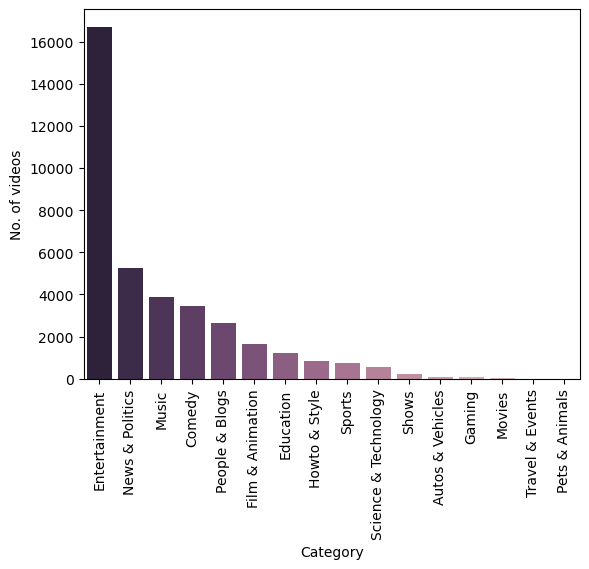

In [59]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We can observe that most of the trending videos are under the **Entertainment** Category. 

## Conclusion:

We answer the following questions through our analysis:
1. **Correlation between dataset variables.**
2. **Video Title Lengths**
3. **Which channels have the largest trending videos**
4. **Trending videos publishing time**
5. **How many trending videos have their comments disabled?**
6. **How many trending videos have their Capital letters in their titles?**
7. **How many trending videos have an error?**
8. **Word Cloud for the titles of our trending videos**
9. **Likes Histogram**
10. **Which video category has the largest number of trending videos?**
<br>
<br>

We concluded through our analysis that:
1. **Views and likes are highly positively correlated(0.85).**
2. Most of the trending videos have their **title lengths** in between the range of **60-80 characters.**
3. **ViratanTV** and **etvteluguindia** are the channels with most of the trending videos. The channel with least trending videos is zeetvtelugu.
4. Number of trending videos published on Sunday and wednesday are noticeably less than the number of trending videos published on other days of the week. **Friday and Sunday have the maximum trending videos published.**
5. More than **90%** people seem to have enabled comments.
6. Approximately **60%** of the video titles **do not consist of Capital letters** where as around **40% have capital letters in their titles**.
7. Out of videos that appeared on trending list (37,352 videos), there is a **tiny portion (11 videos) with errors.**
8. The words **'Episode', 'Song', 'New', 'Full', 'Movie', 'Video', 'Telugu', 'Official', 'Trailer', 'Punjabi'** in huge fonts which indicate these words were common also in trending video titles.
9. Majority of trending videos have **25000** likes or less with a peak for videos with 5000 likes or less.
10. Majority of the trending videos are under the **Entertainment** Category.
